# WHAT THIS PROJECT DESCRIBES
1. Importation of required libraries
2. Describes basic information about the data
3. Exploratory Data Analysis.
Location of the neighbourhoods in the map
lowest host based on calculated host listings 
Top 5 neighbourhoods and areas based on calculated host listings
The cheapest neighbourhood
the cheapest area
the most purchased room type
The cheapest room type
average stay per room type
Average neighbourhood price in new york
Data source : kaggle.com/xyz_dataset




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
def my_function(x):
  return list(dict.fromkeys(x))


In [4]:
data = pd.read_csv("AB2_NYC_2019.CSV")

In [5]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [7]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
data.fillna({'reviews_per_month':0}, inplace=True)

In [9]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,0.0,1,23


In [11]:
data.describe(include = ["O"])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47896,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,6/23/2019
freq,18,417,21661,3920,25409,1413


In [12]:
data1 = data.drop(columns = ["id","host_id","name", "last_review","host_name"])

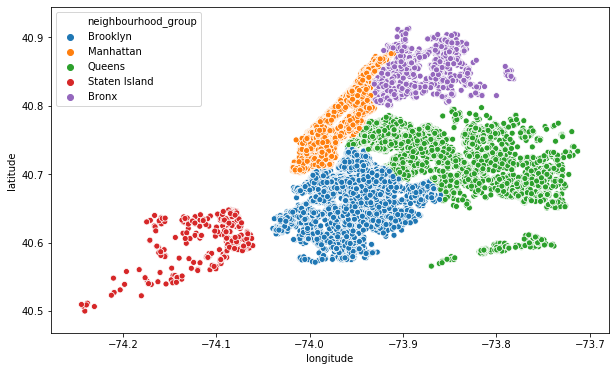

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data1.longitude,data1.latitude,hue=data1.neighbourhood_group)
plt.ioff()

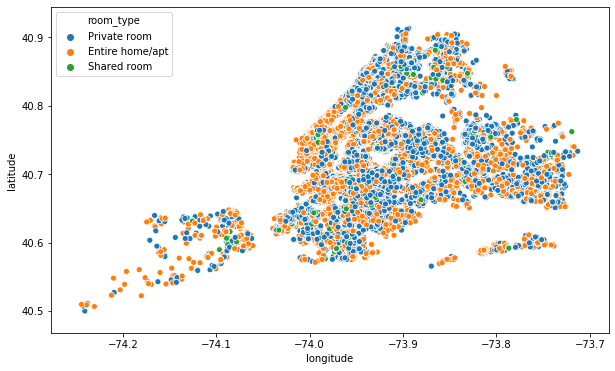

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data1.longitude,data1.latitude,hue=data1.room_type)
plt.ioff()

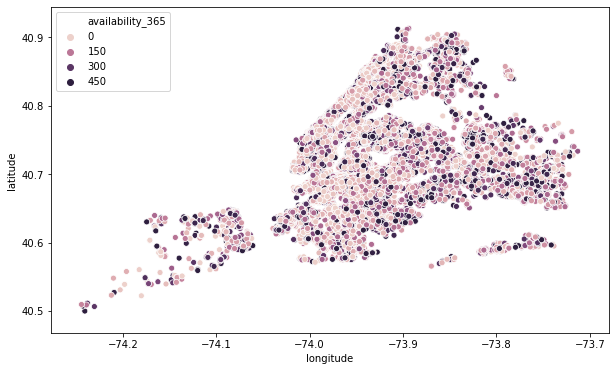

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data1.longitude,data1.latitude,hue=data1.availability_365)
plt.ioff()

In [17]:
data1.corr()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


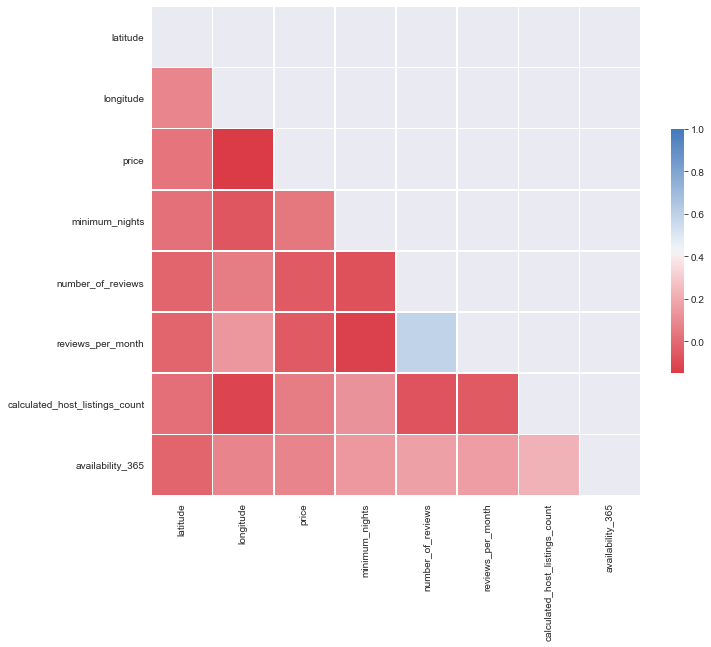

In [18]:
# Compute correlations
corr = data1.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'dark')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

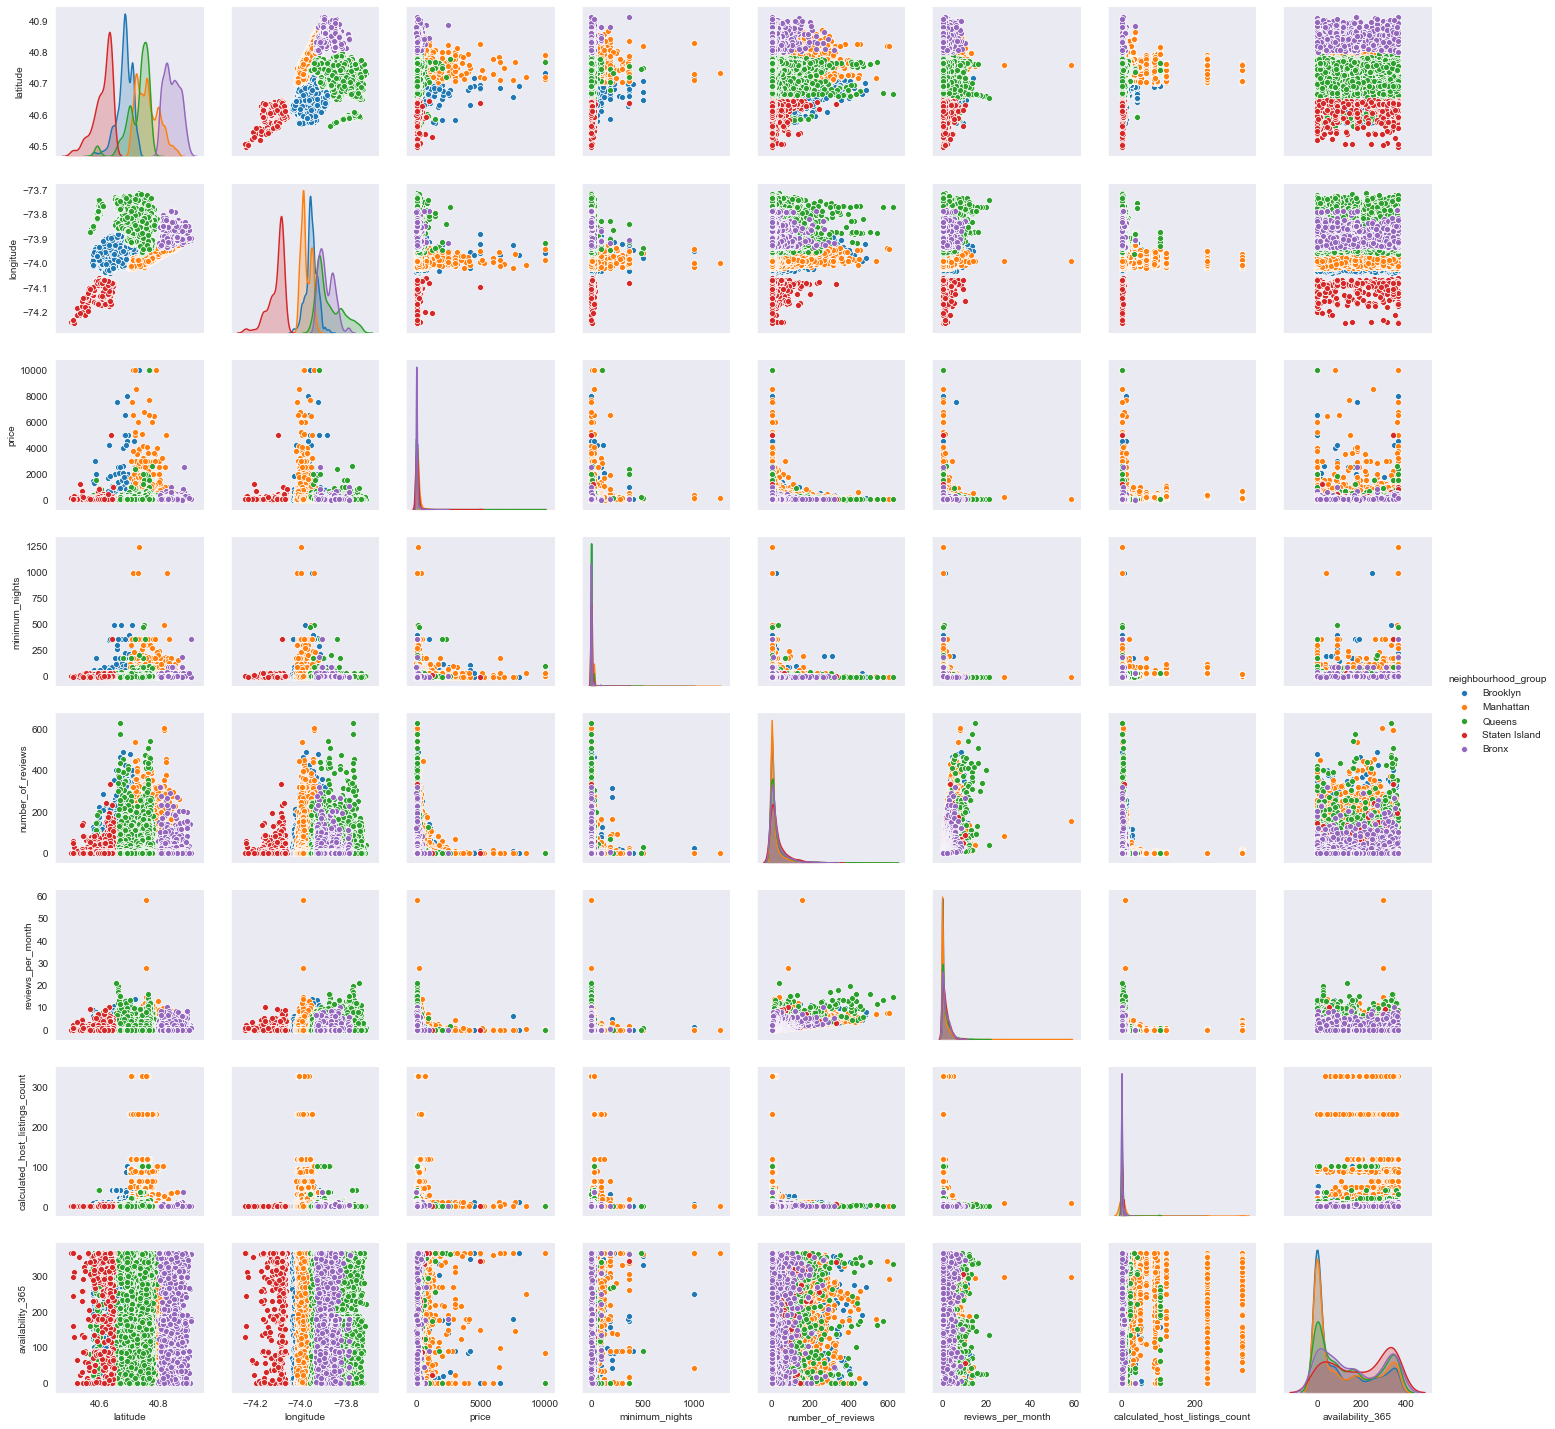

In [38]:
sns.pairplot(data1, hue='neighbourhood_group', height=2.5)
plt.show()

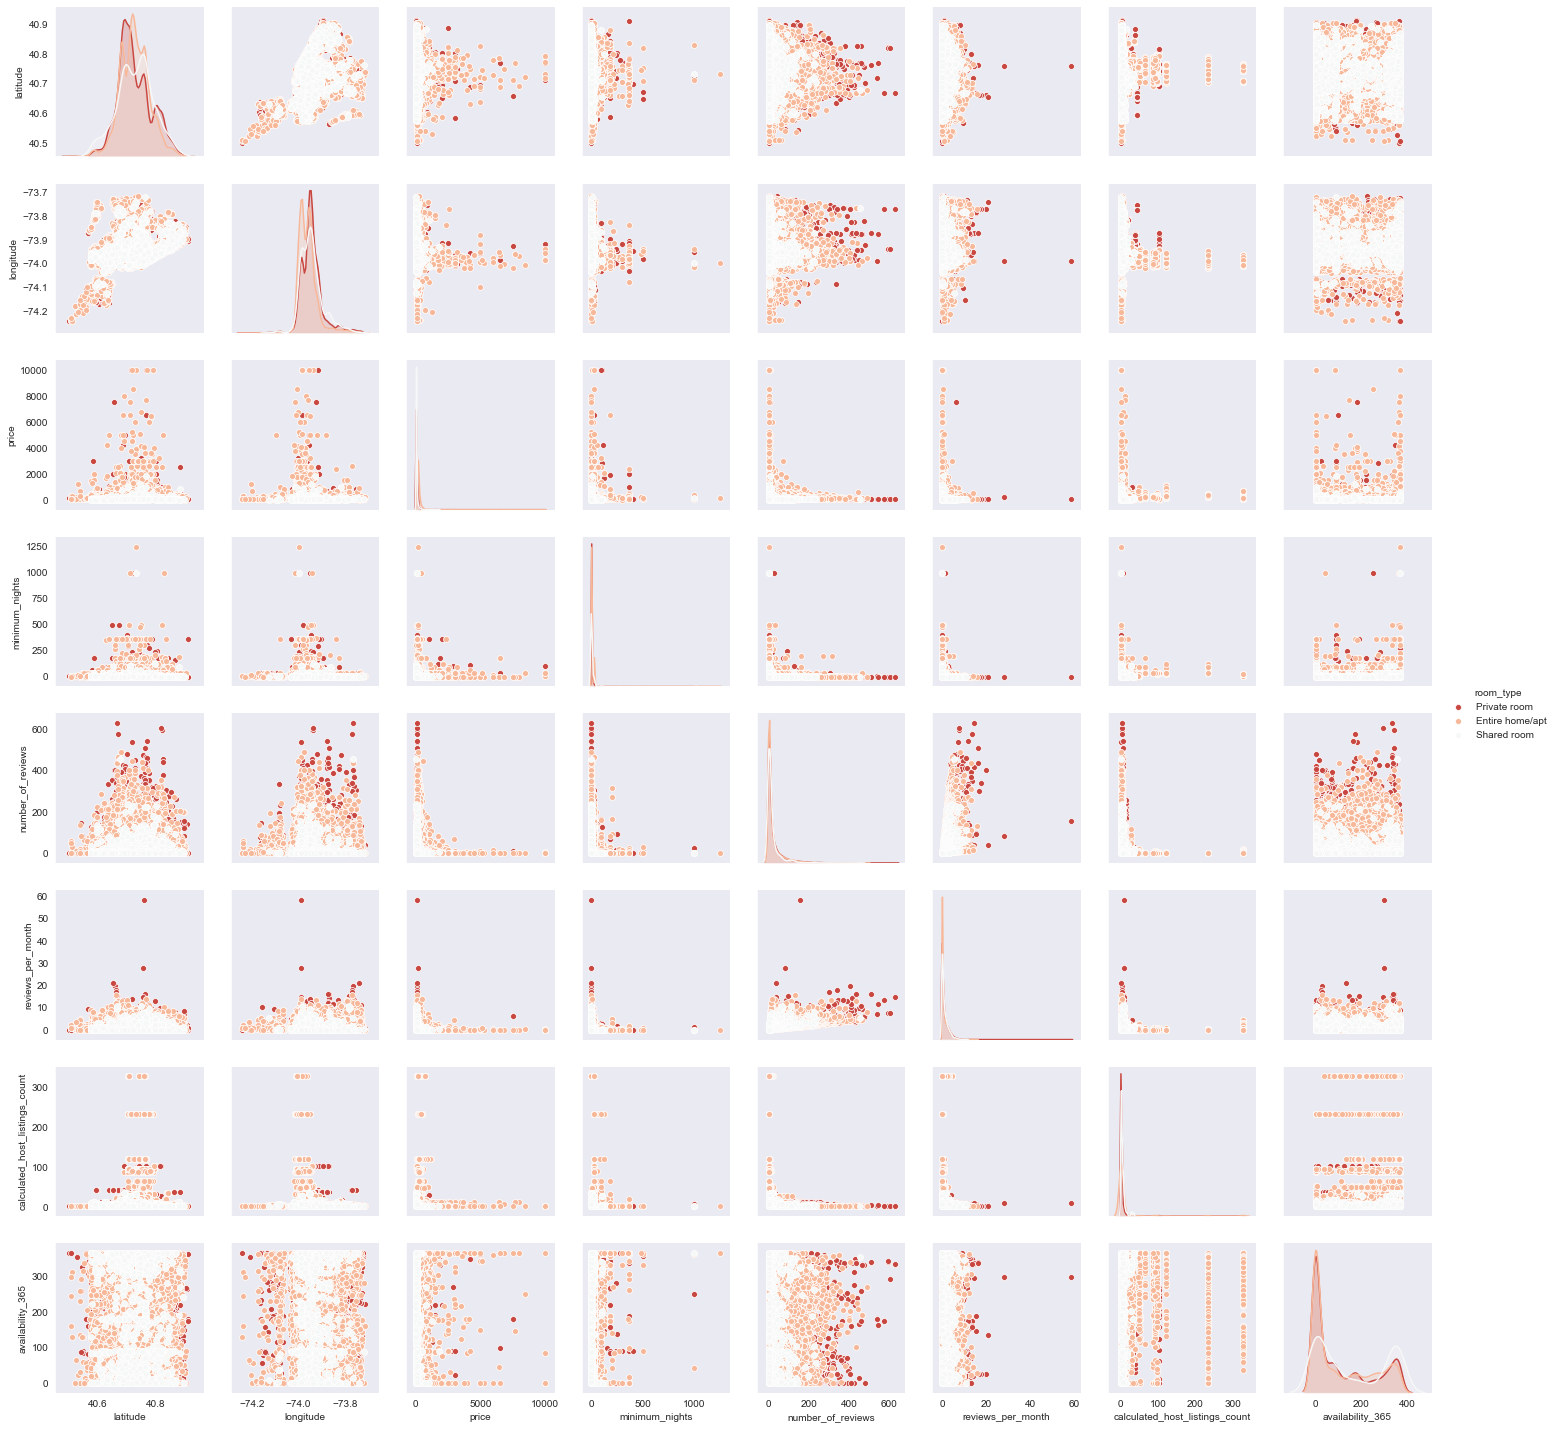

In [41]:
color = sns.color_palette("RdBu",n_colors=5)
sns.pairplot(data1, hue='room_type',palette = color, height=2.5)
plt.show()

In [21]:
grouped_neighbourhood_group = data.groupby("neighbourhood_group")
mean_calculated_host_listings_count = list(grouped_neighbourhood_group.mean()["calculated_host_listings_count"])
mean_calculated_host_listings_count = [round(i,1) for i in mean_calculated_host_listings_count ]
neighbourhood_Group = data.neighbourhood_group
neighbourhood_Group = list(neighbourhood_Group)

neighbourhood_Group = my_function(neighbourhood_Group)
neighbourhood_Group,mean_calculated_host_listings_count 

(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
 [2.2, 2.3, 12.8, 4.1, 2.3])

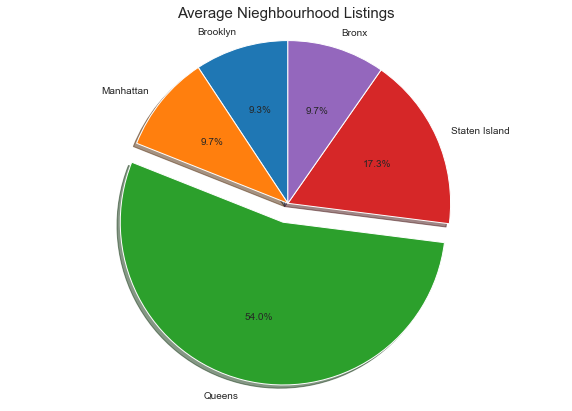

In [22]:

calculated_host_listings_count = mean_calculated_host_listings_count
explode = (0, 0, 0.12, 0, 0)
  # only "explode" the 3rd slice  'queens'

fig1, ax = plt.subplots(figsize=(10,7))
ax.pie(calculated_host_listings_count ,labels=neighbourhood_Group, autopct='%1.1f%%',
        shadow=True, startangle=90,explode = explode)
ax.set_title('Average Nieghbourhood Listings', fontsize = 15)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [23]:
data1

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


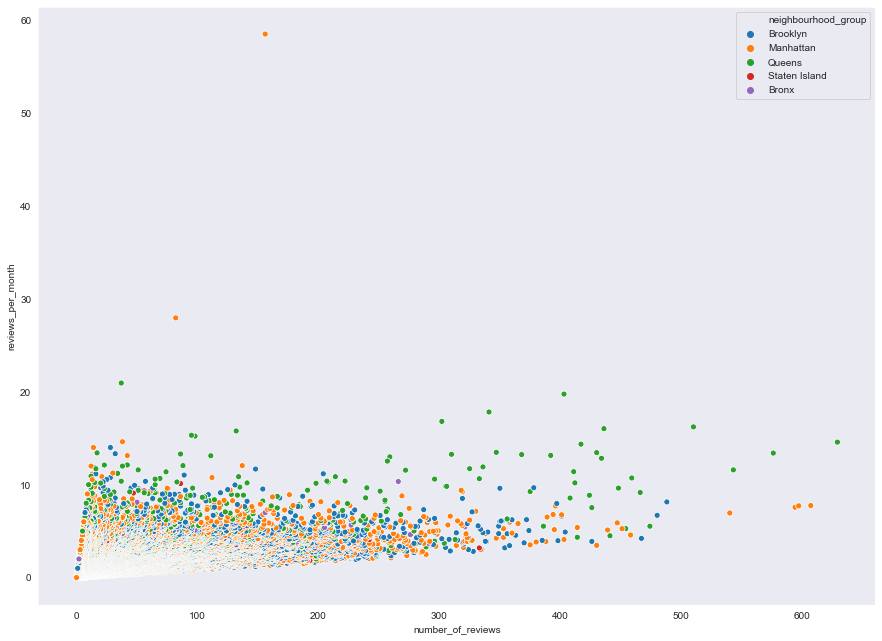

In [32]:
plt.figure(figsize = (15,11))
sns.scatterplot(data1.number_of_reviews,data1.reviews_per_month,hue=data1.neighbourhood_group)
plt.ioff()

In [25]:
result 


,neighbourhood_group,number_of_reviews,reviews_per_month
4,Staten Island,30.941019,1.576381
3,Queens,27.700318,1.567076
0,Bronx,26.004583,1.475655
1,Brooklyn,24.202845,1.049790
2,Manhattan,20.985596,0.976782


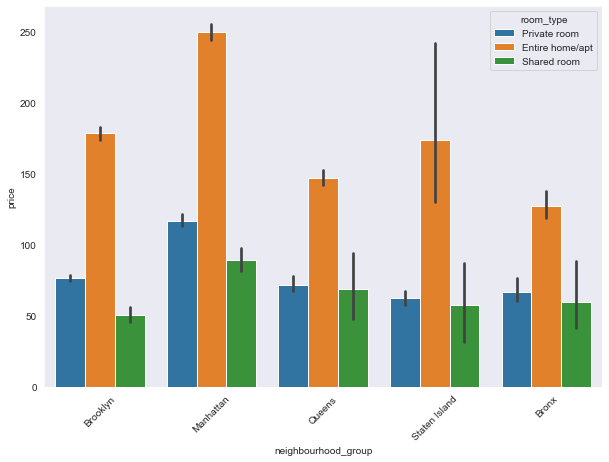

In [26]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = data1)
plt.xticks(rotation=45)
plt.show()

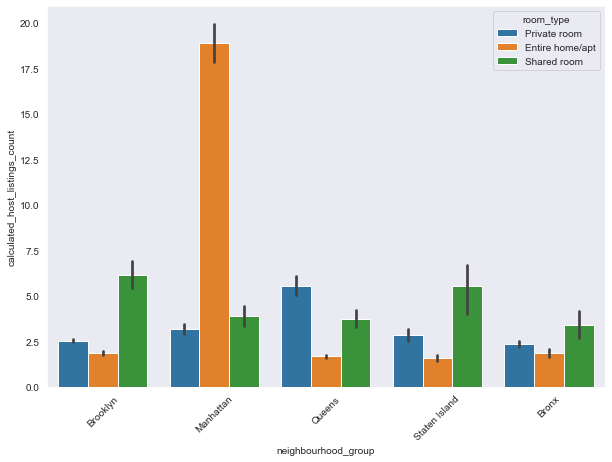

In [28]:
result = data1[["neighbourhood_group",'room_type',"calculated_host_listings_count"]].groupby(['neighbourhood_group'], as_index =False).count().sort_values(by= "calculated_host_listings_count",ascending = False)
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "calculated_host_listings_count", hue = "room_type", data = data1)
plt.xticks(rotation=45)
plt.show()

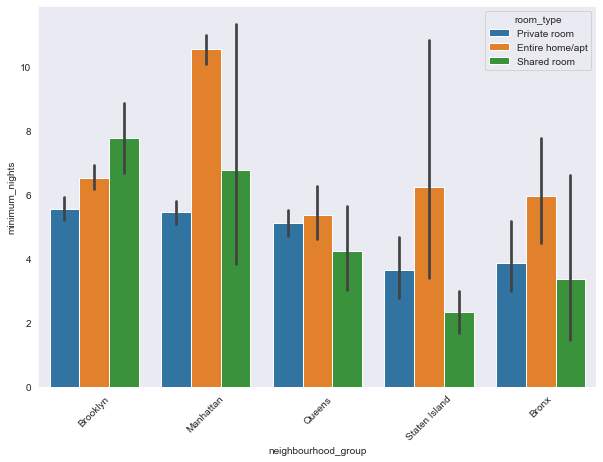

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "minimum_nights", hue = "room_type", data = data1)
plt.xticks(rotation=45)
plt.show()

In [34]:
data1.tail()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2
48894,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23


In [17]:
neighbourhood_area= data[['neighbourhood','calculated_host_listings_count']].groupby(['neighbourhood'], as_index =False).count().sort_values(by= "calculated_host_listings_count",ascending = False)
neighbourhood_area_index = neighbourhood_area.head(20).set_index('neighbourhood')
neighbourhood_area_index

,calculated_host_listings_count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564
